Cat VS Dog Classifier , using SVM

## Importing Required Libraries

In [22]:
import os
import joblib
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog

In [2]:
train_data=r"train"
test_data =r"test1"

In [3]:
#preprocessing the data as per need 

Using HOG features 

A feature descriptor method called Histogram of Oriented Gradients (HOG) is used in computer vision and image processing to recognize objects. In order for HOG to function, an image is divided into tiny areas known as cells, and each cell's gradient orientation histogram is computed. These histograms are resistant to variations in illumination and image distortions because they capture the local shape and gradient information. To represent each image's distinct qualities, HOG features are retrieved in this Cat vs. Dog classifier. These features are then utilized to train a Support Vector Machine (SVM) classifier for precise categorization.

In [4]:
def preprocessing(data_path,is_train=True):
    data=[]
    labels=[]
    
    for file in os.listdir(data_path):
        if is_train:
            label=file.split(".")[0]
            #this line is extracting the label from the name of the file/image in this case 
        else:
            label=None
            #for test data labels are not available
            
        img_path = os.path.join(data_path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(64,64)) #size can be changed as per need
        #,here 64 ,64 has been selected for now as this size is generally uses less time 
        
        
        #converting the image to greyscale to use the HOG feature 
        grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        #computing HOG features 
        
        features,_=hog(grey_img,orientations=8,pixels_per_cell=(8,8),cells_per_block=(1,1),block_norm="L2-Hys",visualize=True)
        data.append(features)
        labels.append(label)
        
    return np.array(data),np.array(labels)


In [5]:
X_train,y_train =preprocessing(train_data)

In [6]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train) 
#this encodes labels into numerical values 

In [7]:
#spliting the data into training and validation 
X_train_split , X_val_split ,y_train_split,y_val_split = train_test_split(X_train,y_train_encoded , test_size =0.2,random_state=42)


In [8]:
#train on SVM classifier
svm_classifier=SVC(kernel="linear")
svm_classifier.fit(X_train_split,y_train_split)

SVC(kernel='linear')

In [23]:
#evaluation on the validation set
y_val_pred = svm_classifier.predict(X_val_split)
accuracy = accuracy_score(y_val_split,y_val_pred)
print("Validation Accuracy:",accuracy*100)
#accuracy obtained is very low , can be boosted by changing the approach from SVM to CNN 

Validation Accuracy: 68.34


In [10]:
#saving the trained model for future use 
joblib.dump(svm_classifier,"svm_model.pkl")


['svm_model.pkl']

In [11]:
#loading the process test data
X_test,_ =preprocessing(test_data,is_train=False)
#makeing prediction 
y_test_pred = svm_classifier.predict(X_test)

#converting numerical values back to labels 
y_test_pred_original = label_encoder.inverse_transform(y_test_pred)

Enter the path to the image you want to classify: test1\1291.jpg


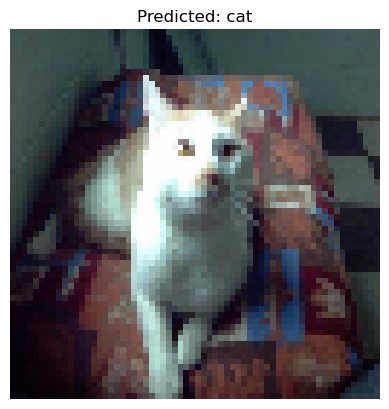

Predicted label: cat


In [21]:
import matplotlib.pyplot as plt
def predict_image(img_path, model, label_encoder):
    img = cv2.imread(img_path)
    if img is None:
        print("Error loading image:", img_path)
        return None#dealing with errors if any after checking the path if file exsits or not 
    
    img = cv2.resize(img, (64, 64))
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(grey_img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm="L2-Hys", visualize=True)
    features = np.array([features])
    prediction = model.predict(features)
    predicted_label = label_encoder.inverse_transform(prediction)[0]
    
    # Displaying the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()
    
    return predicted_label

# Geting user input for image path
user_img_path = input("Enter the path to the image you want to classify: ")

# Predicting the class of the user input image
predicted_label = predict_image(user_img_path, svm_model, label_encoder)
if predicted_label is not None:
    print("Predicted label:", predicted_label)
